# Bitcoin price evolution

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/data

Using `bitcoin_cash_price.csv`

In [81]:
%%bash
ls -lh

total 232K
-rw-r--r-- 1 root root 217K Jan 25 21:17 TimeSeries.ipynb
-rw-rw-r-- 1 1000 1000 7.8K Jan 15 00:22 bitcoin_cash_price.csv


In [190]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

In [122]:
df = pd.read_csv('bitcoin_cash_price.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
Date          108 non-null datetime64[ns]
Open          108 non-null float64
High          108 non-null float64
Low           108 non-null float64
Close         108 non-null float64
Volume        108 non-null object
Market Cap    108 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 6.0+ KB


In [123]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,602.68,626.21,602.45,616.30,"375,367,000","10,105,200,000"
1,2017-11-06,630.31,657.34,602.65,602.65,"794,105,000","10,566,600,000"
2,2017-11-05,619.91,635.72,579.13,630.70,"816,028,000","10,390,900,000"


In [124]:
# Market Cap has '-' values
df['Volume'] = df['Volume'].apply(lambda x: x.replace(',',''))
df['Volume'] = df['Volume'].astype('float64')

df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap            object
dtype: object

In [86]:
# df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
# df['Market Cap'] = df['Market Cap'].apply(\
#             lambda x: pd.to_numeric(x.replace(',','')))

# # , errors='coerce')

# df.head(3)

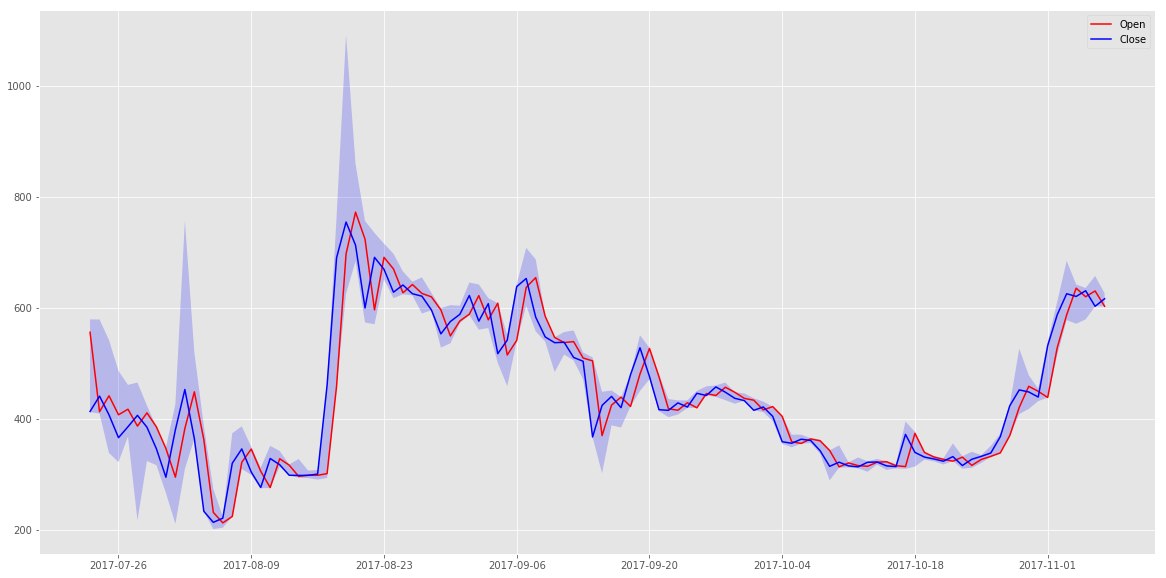

In [87]:
plt.figure(figsize=(20,10))

# df.boxplot()
df.index = df['Date']

plt.plot(df.index, df['Open'], c='r')
plt.plot(df.index, df['Close'], c='b')

plt.fill_between(df.index, df['Low'], df['High'], facecolor='blue', alpha=.2)
#plt.fill_between(df.index, 0, df['Low'], alpha=.8)

plt.legend()

plt.show()

In [188]:
print(plt.style.available)

['seaborn-darkgrid', 'dark_background', 'seaborn-ticks', 'classic', 'grayscale', 'seaborn-whitegrid', 'seaborn-talk', 'seaborn-dark-palette', '_classic_test', 'seaborn-poster', 'fivethirtyeight', 'ggplot', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-paper', 'seaborn-bright', 'seaborn-muted', 'seaborn-deep', 'seaborn-pastel', 'seaborn-white', 'seaborn-dark', 'seaborn', 'bmh']


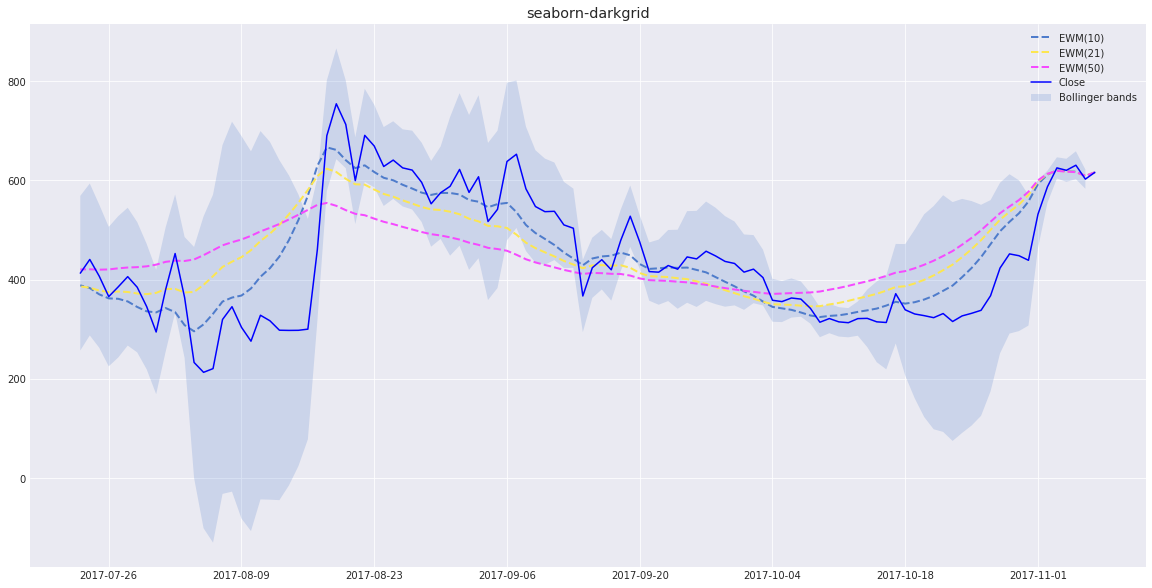

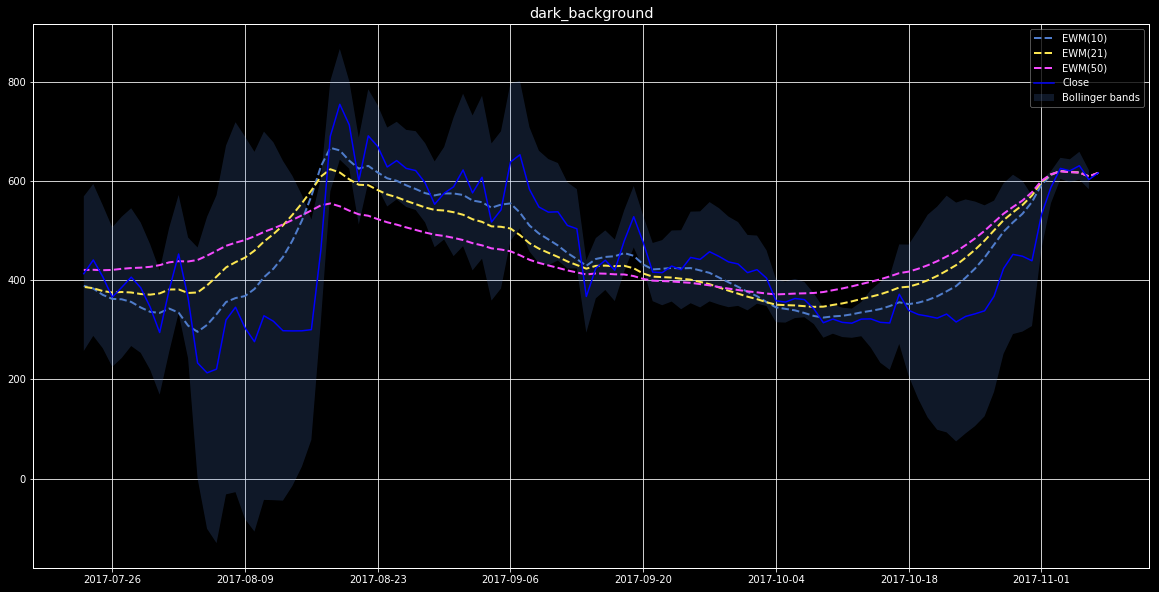

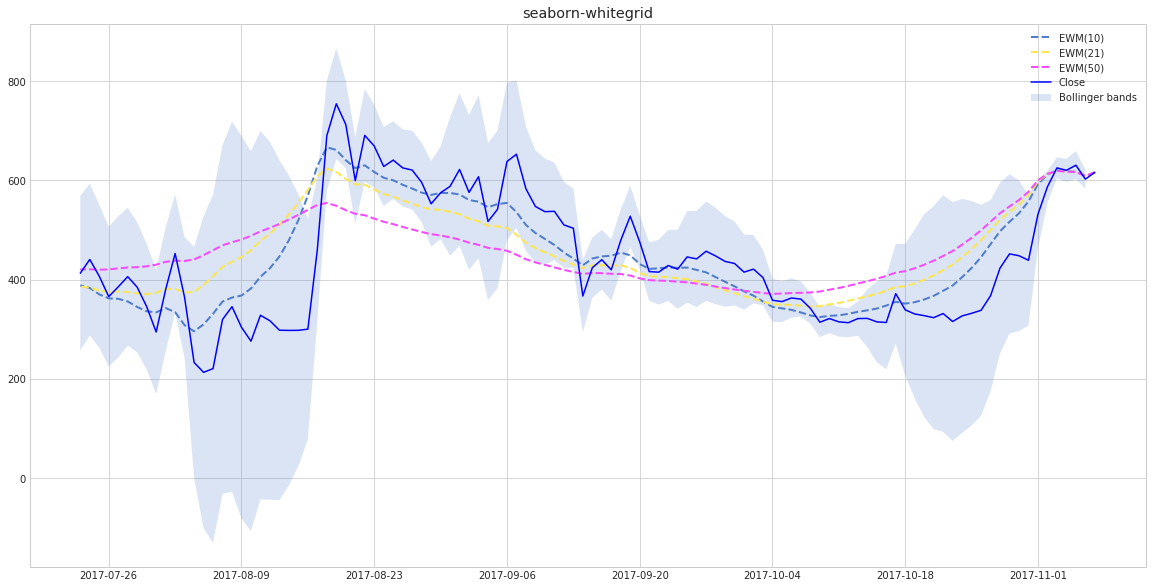

In [202]:
# https://www.tradeciety.com/how-to-use-moving-averages/

styles = ['seaborn-darkgrid', 'dark_background', 'seaborn-whitegrid']

for style in styles: # plt.style.available
    with plt.style.context((style)):
        fig = plt.figure(figsize=(20,10))
        
        # plt.rcParams['axes.facecolor'] = '#262626'
        # plt.rcParams['figure.facecolor'] = '#262626'
        
        plt.title(style)
        # df.boxplot()
        df.index = df['Date']

        min_per = 1

        # plt.plot(df.index, df['Close'].rolling(15, min_periods=min_per).mean(), '--', c='r', label='SMA(15)')
        # setting alpha=0.3 is mutually exclusive of span
        plt.plot(df.index, df['Close'].ewm(span=10, min_periods=min_per).mean(), '--', lw=2, c='#4f7ccb', label='EWM(10)')
        plt.plot(df.index, df['Close'].ewm(span=21, min_periods=min_per).mean(), '--', lw=2, c='#fce651', label='EWM(21)')
        plt.plot(df.index, df['Close'].ewm(span=50, min_periods=min_per).mean(), '--', lw=2, c='#f54aff', label='EWM(50)')
        plt.plot(df.index, df['Close'], c='b', label='Close')

        rolling_std = df['Close'].rolling(15, min_periods=min_per).std()
        plt.fill_between(df.index, df['Close'] - 2*rolling_std, df['Close'] + 2*rolling_std, facecolor='#4f7ccb', alpha=.2, label='Bollinger bands')
        #plt.fill_between(df.index, df['Low'], df['High'], facecolor='blue', alpha=.2)
        #plt.fill_between(df.index, 0, df['Low'], alpha=.8)

        plt.legend()

        plt.show()

In [88]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


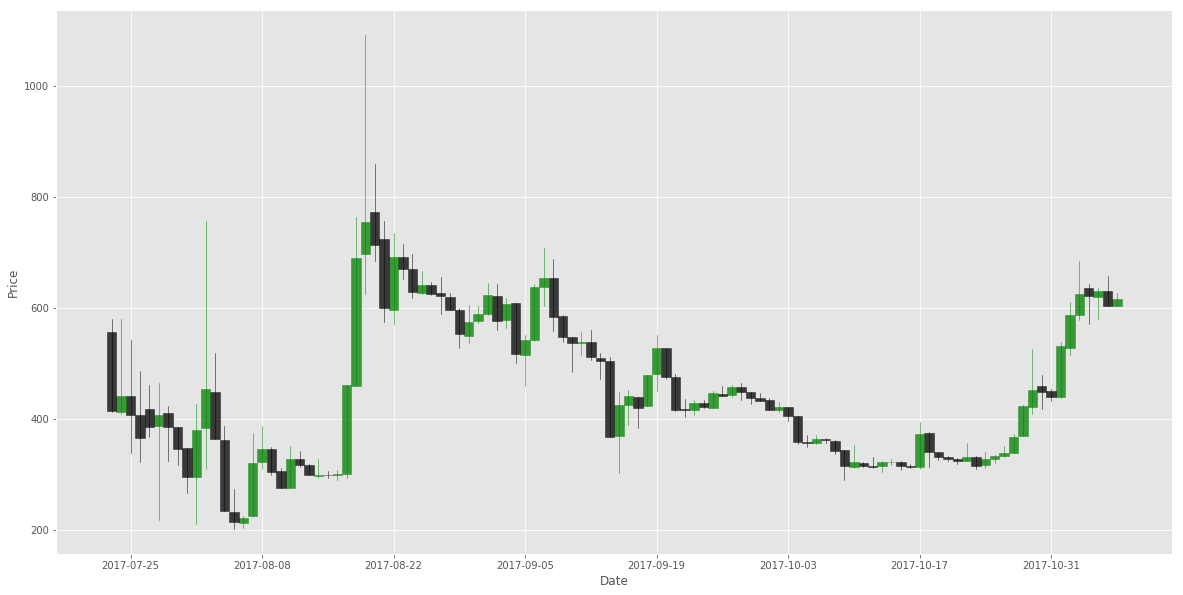

In [89]:
# https://stackoverflow.com/questions/42437349/candlestick-plot-from-a-pandas-dataframe

def candlestick(df):
    df_ohlc = df

    #Converting dates column to float values
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

    #Making plot
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=6, colspan=1)

    #Converts raw mdate numbers to dates
    ax1.xaxis_date()
    plt.xlabel('Date')
    #print(df_ohlc)

    #Making candlestick plot
    candlestick_ohlc(ax1,df_ohlc.values,width=1, colorup='g', colordown='k',alpha=0.75)
    plt.ylabel('Price')
    plt.legend()

    plt.show()

candlestick(df)

In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import numpy as np

In [125]:
features = ['Open', 'High', 'Low', 'Volume']
X = np.array(df[features]).reshape(-1,len(features))
Y = np.array(df['Close']).reshape(-1,1)

print(type(X))
print(type(Y))

print(X[:3])
print(Y[:3])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[  6.02680000e+02   6.26210000e+02   6.02450000e+02   3.75367000e+08]
 [  6.30310000e+02   6.57340000e+02   6.02650000e+02   7.94105000e+08]
 [  6.19910000e+02   6.35720000e+02   5.79130000e+02   8.16028000e+08]]
[[ 616.3 ]
 [ 602.65]
 [ 630.7 ]]


In [126]:
x_train, x_test, y_train, y_test = train_test_split(\
    X, Y, test_size=0.33, random_state=42)


for item in ['x_train', 'x_test', 'y_train', 'y_test']:
    print('%s: %s' % (item, eval(item).shape))
    print('%s: %s:'% (item, type(eval(item))))
    print('%s: %s:'% (item, eval(item)[:5]))

x_train: (72, 4)
x_train: <class 'numpy.ndarray'>:
x_train: [[  3.13220000e+02   3.52020000e+02   3.11700000e+02   3.67809000e+08]
 [  4.56710000e+02   4.65200000e+02   4.33500000e+02   3.00421000e+08]
 [  5.27680000e+02   6.10390000e+02   5.14520000e+02   1.63206000e+09]
 [  3.69490000e+02   4.48390000e+02   3.01690000e+02   7.07231000e+08]
 [  5.55890000e+02   5.78970000e+02   4.11780000e+02   8.50130000e+04]]:
x_test: (36, 4)
x_test: <class 'numpy.ndarray'>:
x_test: [[  5.96190000e+02   7.34880000e+02   5.70270000e+02   1.39326000e+09]
 [  3.69540000e+02   4.25440000e+02   3.69060000e+02   7.81037000e+08]
 [  5.87320000e+02   6.84530000e+02   5.77860000e+02   1.68221000e+09]
 [  2.97970000e+02   3.07620000e+02   2.90210000e+02   1.06436000e+08]
 [  5.41280000e+02   6.42690000e+02   5.39960000e+02   6.93240000e+08]]:
y_train: (72, 1)
y_train: <class 'numpy.ndarray'>:
y_train: [[ 321.59]
 [ 447.81]
 [ 587.22]
 [ 424.02]
 [ 413.06]]:
y_test: (36, 1)
y_test: <class 'numpy.ndarray'>:
y_t

In [127]:
model = linear_model.LinearRegression() # normalize=True

In [129]:
# https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn

# model.fit(np.array(df.index).reshape(-1,1), df['Close'])
model.fit(x_train,y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(train_rmse)
print(test_rmse)

26.403188932
33.3435594796


In [149]:
print(len(df.index[:len(x_train):]))
print(len(y_pred_train))

print(len(df.index[len(x_train):]))
print(len(y_pred_test))

72
72
36
36


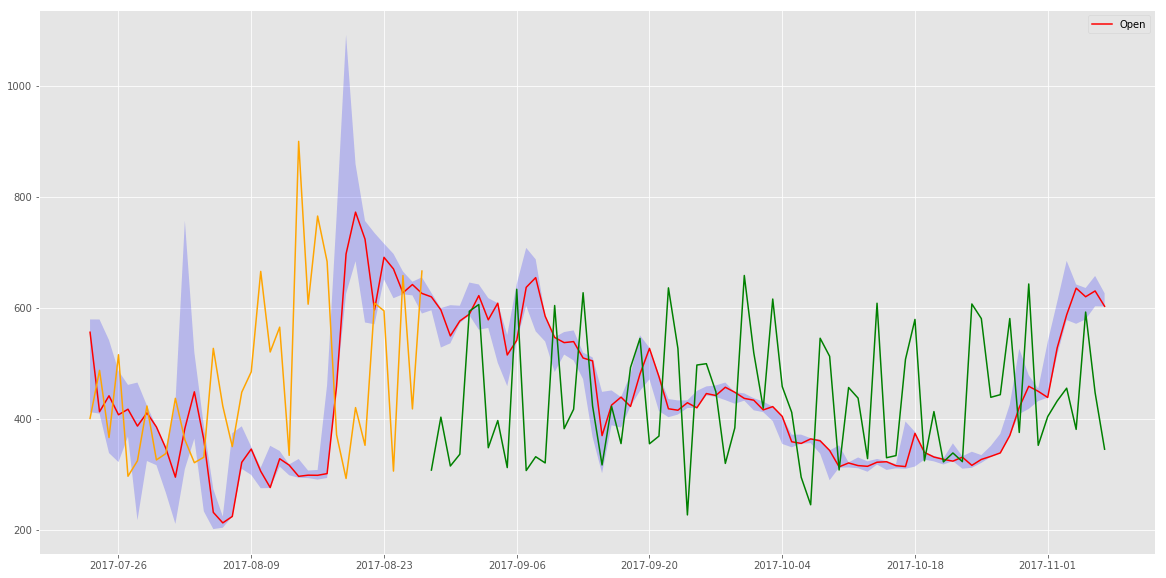

In [151]:
plt.figure(figsize=(20,10))

# df.boxplot()
df.index = df['Date']

plt.plot(df.index, df['Open'], c='r')
plt.plot(df.index[:len(x_train)], y_pred_train, c='green')
plt.plot(df.index[len(x_train):], y_pred_test, c='orange')

plt.fill_between(df.index, df['Low'], df['High'], facecolor='blue', alpha=.2)
#plt.fill_between(df.index, 0, df['Low'], alpha=.8)

plt.legend()

plt.show()